# GRIP - THE SPARK FOUNDATION

## Data Science and Business Analytics Internship

### Predicition using Supervised ML

###### TASK-1 : Predict the percentage of an student based on the no. of study hours.

Problem Statement : In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.This is a simple linear regression task as it involves just 2 variables.

##### Author - Arigela Dileep

#### STEP 1 - Importing the libraries and dataset

In this step, all the required packages and data is imported.

In [1]:
#importing the required packages
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
print("Libraries are imported")

Libraries are imported


In [2]:
#importing dataset
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("data is imported")

data is imported


#### Step 2 - Data Exploration

In [3]:
#print the given data
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#printing the head part of the given data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#printing the tail part of the given data
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
#to get no of rows and columns
data.shape 

(25, 2)

In [7]:
#describing the given data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#to get the type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
#Checking for the missing or null values in dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
#Checking the correlation between Hours and Scores
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


This shows the highest correlation between the Hours and Scores

#### STEP 3 - Visualizing the dataset

We will plot the dataset and check if there is any relation between the variables

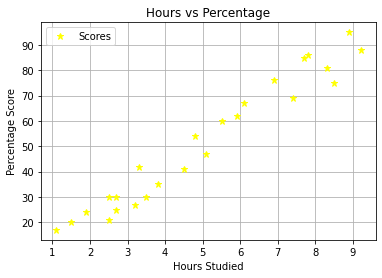

In [11]:
data.plot(x='Hours', y='Scores', style='*', color='yellow', markersize=7)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

By observing the graph we can say that there is a linear relationship between "hours studied" and "percentage score". So, we will use linear regression supervised machine model and predict the coming values.

#### STEP 4 - Data preparation

#### In this step we will divide the data into inputs and outputs. And then we will divide the whole dataset into 2 parts - testing data and training data.

In [12]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0)

#### STEP 5 - Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [14]:
from sklearn.linear_model import LinearRegression  

model = LinearRegression()  
model.fit(X_train, Y_train)

LinearRegression()

#### STEP 6 - Visualizing the model

Visualizing the model after training it

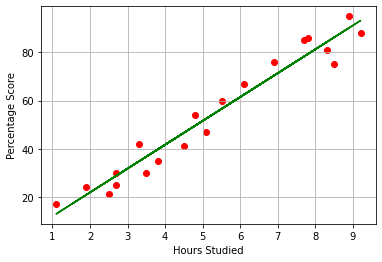

In [15]:
line = model.coef_*X + model.intercept_

# Plotting for the training data
plt.scatter(X_train, Y_train, color='red')
plt.plot(X, line, color='green');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

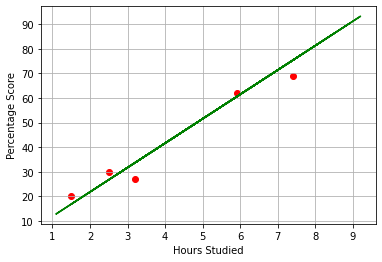

In [16]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X, line, color='green');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

#### STEP 7 - Making Predictions

After training the algorithm, it's time to make some predictions.

In [17]:
Y_predicted = model.predict(X_test)

In [18]:
df = pd.DataFrame({'Actual score': Y_test, 'Predicted score': Y_predicted})  
df

,Actual score,Predicted score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


##### What will be predicted score if a student studies for 9.25 hrs/ day?

In [19]:
hrs = 9.25
own_prediction = model.predict([[hrs]])
print("The predicted score if a person studies for",hrs,"hours is",own_prediction[0])

The predicted score if a person studies for 9.25 hours is 93.69173248737538


If a student students for 9.25 hours then the predicted score is 93.69173248737539

#### STEP 8 - Evaluating the model

Final step ,we are going to evaluate our trained model by calculating mean absolute error

In [20]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predicted))

Mean Absolute Error: 4.183859899002975


The Mean Absolute Error is 4.183859899002982